Las ecuaciones de Navier–Stokes para un fluido incompresible, donde $\vec{v}$ es el campo de velocidad:

$$
\begin{align}
\nabla \cdot\vec{v} &=& 0 \\
\frac{\partial \vec{v}}{\partial t}+(\vec{v}\cdot\nabla)\vec{v} &=& -\frac{1}{\rho}\nabla p + \nu \nabla^2\vec{v}
\end{align}
$$

La primera ecuación representa conservación de masa con densidad constante. La segunda ecuación representa conservación del momento. Existe el problema de separar las variables de presión y velocidad, lo que no se puede hacer facilmente. Para lidiar con esta dificultad es posible tomar la divergencia de la conservación del momento, dando lugar a una ecuación de Poisson para la presión. De esta forma se garantiza que la presión cumple con la ecuación de conservación. Una vez obtenida las velocidades para una iteración, se procederá resolviendo esta ecuación de Poisson para encontrar la presión.

Hay que tener en cuenta que $(\vec{v}\cdot\nabla) =u\frac{\partial }{\partial x}+v\frac{\partial }{\partial y} + w\frac{\partial }{\partial z} $, que se puede considerar un operador diferencial actuando en cada componente de $\vec{v}$

Tomando la divergencia y utilizando $\nabla \cdot \vec{v}= 0$ se puede obtener: 

$$
	\nabla \cdot ((\vec{v}\cdot\nabla)\vec{v} )= \frac{1}{\rho}\nabla^2 p 
$$

Debido al esquema de discretización, a la hora de expandir se deben despreciar las derivadas de segundo orden. Sabiendo entonces que $(\vec{v}\cdot\nabla)\vec{v} = (u\frac{\partial u}{\partial x}+v\frac{\partial u}{\partial y} + w\frac{\partial u}{\partial z}, u\frac{\partial v}{\partial x}+v\frac{\partial v}{\partial y} + w\frac{\partial v}{\partial z}, u\frac{\partial w}{\partial x}+v\frac{\partial w}{\partial y} + w\frac{\partial w}{\partial z})$, $\nabla \cdot ((\vec{v}\cdot\nabla)\vec{v} )$ queda: 

$$
\frac{\partial u}{\partial x}\frac{\partial u}{\partial x} + \frac{\partial v}{\partial y}\frac{\partial v}{\partial y} + \frac{\partial w}{\partial z}\frac{\partial w}{\partial z} + 2\frac{\partial u}{\partial y}\frac{\partial v}{\partial x} + 2\frac{\partial u}{\partial z}\frac{\partial w}{\partial x} + 2\frac{\partial v}{\partial z}\frac{\partial w}{\partial y} 
$$

Con lo cual, las ecuaciones de Navier Stokes quedan:

$$
\frac{\partial u}{\partial t}+u\frac{\partial u}{\partial x}+v\frac{\partial u}{\partial y} + w\frac{\partial u}{\partial z} = -\frac{1}{\rho}\frac{\partial p}{\partial x}+\nu\left(\frac{\partial^2 u}{\partial x^2}+\frac{\partial^2 u}{\partial y^2} + \frac{\partial^2 u}{\partial z^2}\right)
$$

$$
\frac{\partial v}{\partial t}+u\frac{\partial v}{\partial x}+v\frac{\partial v}{\partial y} + w\frac{\partial v}{\partial z} = -\frac{1}{\rho}\frac{\partial p}{\partial y}+\nu\left(\frac{\partial^2 v}{\partial x^2}+\frac{\partial^2 v}{\partial y^2} + \frac{\partial^2 v}{\partial z^2}\right)
$$

$$
\frac{\partial w}{\partial t}+u\frac{\partial w}{\partial x}+v\frac{\partial w}{\partial y} + w\frac{\partial w}{\partial z} = -\frac{1}{\rho}\frac{\partial p}{\partial z}+\nu\left(\frac{\partial^2 w}{\partial x^2}+\frac{\partial^2 w}{\partial y^2} + \frac{\partial^2 w}{\partial z^2}\right)
$$

$$
\frac{\partial^2 p}{\partial x^2} + \frac{\partial^2 p}{\partial y^2} + \frac{\partial^2 p}{\partial z^2} = -\rho\left(
	\frac{\partial u}{\partial x}\frac{\partial u}{\partial x} + \frac{\partial v}{\partial y}\frac{\partial v}{\partial y} + \frac{\partial w}{\partial z}\frac{\partial w}{\partial z} + 2\frac{\partial u}{\partial y}\frac{\partial v}{\partial x} + 2\frac{\partial u}{\partial z}\frac{\partial w}{\partial x} + 2\frac{\partial v}{\partial z}\frac{\partial w}{\partial y} 
\right)
$$

Para discretizar las ecuaciones del momento se trabajará sobre una rejilla de puntos discretos en el espacio y el tiempo. En cuanto a las derivadas, la derivada parcial con respecto al tiempo se discretizará con diferencias finitas adelantadas y la derivadas con respecto al espacio con diferencias finitas atrasadas. Estas discretizaciones vienen de la definición de límite de la derivada. En el espacio:

$$
\frac{\partial u}{\partial x} = \frac{u_{i,j,k}^{n} - u_{i-1,j,k}^{n}}{\Delta x} + O(\Delta x)
$$

Y en el tiempo:

$$
\frac{\partial u}{\partial t} = \frac{u_{i,j,k}^{n+1} - u_{i,j,k}^{n}}{\Delta t} + O(\Delta t)
$$

Para la presión, se utilizará una diferencia central:
$$
\frac{\partial p}{\partial x} = \frac{p_{i+1,j,k}^{n} - p_{i-1,j,k}^{n}}{2\Delta x} + O(\Delta x ^2)
$$
Donde los superindices $n$ representan pasos en el tiempo y los subindices $i$ pasos en el espacio.

Para discretizar la derivada parcial de segundo orden, se puede utilizar una diferencia central:

$$
\frac{\partial^2 u}{\partial x^2} = \frac{u_{i+1} - 2u_i + u_{i-1}}{\Delta x^2} + O(\Delta x ^2)
$$

De esta manera es posible discretizar las ecuaciones del momento:

$$
\begin{split}
& \frac{u_{i,j,k}^{n+1} - u_{i,j,k}^{n}}{\Delta t} + u_{i,j,k}^{n}\frac{u_{i,j,k}^{n}-u_{i-1,j,k}^{n}}{\Delta x}+v_{i,j,k}^{n}\frac{u_{i,j,k}^{n}-u_{i,j-1,k}^{n}}{\Delta y} + w_{i,j,k}^{n}\frac{u_{i,j,k}^{n}-u_{i,j,k-1}^{n}}{\Delta z}= \\ 
& \qquad -\frac{1}{\rho}\frac{p_{i+1,j,k}^{n} - p_{i-1,j,k}^{n}}{2\Delta x}+\nu\left(\frac{u_{i+1,j,k}^{n}-2u_{i,j,k}^{n}+u_{i-1,j,k}^{n}}{\Delta x^2}+\frac{u_{i,j+1,k}^{n}-2u_{i,j,k}^{n}+u_{i,j-1,k}^{n}}{\Delta y^2} +\frac{u_{i,j,k+1}^{n}-2u_{i,j,k}^{n}+u_{i,j,k+1}^{n}}{\Delta z^2}\right)
\end{split}
$$

$$
\begin{split}
& \frac{v_{i,j,k}^{n+1} - v_{i,j,k}^{n}}{\Delta t} + u_{i,j,k}^{n}\frac{v_{i,j,k}^{n}-v_{i-1,j,k}^{n}}{\Delta x}+v_{i,j,k}^{n}\frac{v_{i,j,k}^{n}-v_{i,j-1,k}^{n}}{\Delta y} + w_{i,j,k}^{n}\frac{v_{i,j,k}^{n}-v_{i,j,k-1}^{n}}{\Delta z}= \\ 
& \qquad -\frac{1}{\rho}\frac{p_{i,j+1,k}^{n} - p_{i,j-1,k}^{n}}{2\Delta x}+\nu\left(\frac{v_{i+1,j,k}^{n}-2v_{i,j,k}^{n}+v_{i-1,j,k}^{n}}{\Delta x^2}+\frac{v_{i,j+1,k}^{n}-2v_{i,j,k}^{n}+v_{i,j-1,k}^{n}}{\Delta y^2} +\frac{v_{i,j,k+1}^{n}-2v_{i,j,k}^{n}+v_{i,j,k+1}^{n}}{\Delta z^2}\right)
\end{split}
$$

$$
\begin{split}
& \frac{w_{i,j,k}^{n+1} - w_{i,j,k}^{n}}{\Delta t} + u_{i,j,k}^{n}\frac{w_{i,j,k}^{n} - w_{i-1,j,k}^{n}}{\Delta x} + v_{i,j,k}^{n}\frac{w_{i,j,k}^{n}-w_{i,j-1,k}^{n}}{\Delta y} + w_{i,j,k}^{n}\frac{w_{i,j,k}^{n}-w_{i,j,k-1}^{n}}{\Delta z}= \\ 
& \qquad -\frac{1}{\rho}\frac{p_{i+1,j,k}^{n} - p_{i-1,j,k}^{n}}{2\Delta x}+\nu\left(\frac{w_{i+1,j,k}^{n}-2w_{i,j,k}^{n}+w_{i-1,j,k}^{n}}{\Delta x^2}+\frac{w_{i,j+1,k}^{n}-2w_{i,j,k}^{n}+w_{i,j-1,k}^{n}}{\Delta y^2} +\frac{w_{i,j,k+1}^{n}-2w_{i,j,k}^{n}+w_{i,j,k-1}^{n}}{\Delta z^2}\right)
\end{split}
$$

Para la ecuación de poisson que describe la presión, se utilizarán diferencias centrales en las derivadas espaciales.

$$
\frac{p_{i+1,j,k}^{n}-2p_{i,j,k}^{n}+p_{i-1,j,k}^{n}}{\Delta x^2}+\frac{p_{i,j+1,k}^{n}-2p_{i,j,k}^{n}+p_{i,j-1,k}^{n}}{\Delta y^2} +\frac{p_{i,j,k+1}^{n}-2p_{i,j,k}^{n}+p_{i,j,k-1}^{n}}{\Delta z^2} = b_{i,j,k}^n
$$
Donde se ha definido $b_{i,j,k}^n$ por conveniencia:

$$

\begin{split}
\frac{b_{i,j,k}^n}{\rho} = & \frac{1}{\Delta t}\left(\frac{u_{i+1,j,k}-u_{i-1,j,k}}{2\Delta x} + \frac{v_{i,j+1,k}-v_{i,j-1,k}}{2\Delta y}+ \frac{w_{i,j,k+1}-w_{i,j,k-1}}{2\Delta z}\right) - \left(\frac{v_{i+1,j,k}-v_{i-1,j,k}}{2\Delta x}\right)^2 - \left(\frac{v_{i,j+1,k}-v_{i,j-1,k}}{2\Delta y}\right)^2 - \left(\frac{v_{i,j,k+1}-v_{i,j,k-1}}{2\Delta z}\right)^2 \\ 
& - 2\frac{u_{i,j+1,k}-u_{i,j-1,k}}{2\Delta y}\frac{v_{i+1,j,k}-v_{i-1,j,k}}{2\Delta x} - 2\frac{u_{i,j,k+1}-u_{i,j,k-1}}{2\Delta z}\frac{w_{i+1,j,k}-w_{i-1,j,k}}{2\Delta x} - 2\frac{v_{i,j,k+1}-v_{i,j,k-1}}{2\Delta z}\frac{w_{i,j+1,k}-w_{i,j-1,k}}{2\Delta y} 
\end{split}

$$

https://cfd.university/learn/10-key-concepts-everyone-must-understand-in-cfd/how-to-discretise-the-navier-stokes-equations/

Una vez discretizadas las ecuaciones, se deben resolver para realizar una solución iterativa. Se resuleve para encontrar cada velocidad en un paso de tiempo siguiente:

$$
\begin{split}
u_{i,j,k}^{n+1} = u_{i,j,k}^{n} & - u_{i,j,k}^{n}\frac{u_{i,j,k}^{n}-u_{i-1,j,k}^{n}}{\Delta x} - v_{i,j,k}^{n}\frac{u_{i,j,k}^{n}-u_{i,j-1,k}^{n}}{\Delta y} - w_{i,j,k}^{n}\frac{u_{i,j,k}^{n}-u_{i,j,k-1}^{n}}{\Delta z} \\
& -\frac{1}{\rho}\frac{p_{i+1,j,k}^{n} - p_{i-1,j,k}^{n}}{2\Delta x} \\
& +\nu\left(\frac{u_{i+1,j,k}^{n}-2u_{i,j,k}^{n}+u_{i-1,j,k}^{n}}{\Delta x^2}+\frac{u_{i,j+1,k}^{n}-2u_{i,j,k}^{n}+u_{i,j-1,k}^{n}}{\Delta y^2} +\frac{u_{i,j,k+1}^{n}-2u_{i,j,k}^{n}+u_{i,j,k+1}^{n}}{\Delta z^2}\right)
\end{split}
$$

$$
\begin{split}
v_{i,j,k}^{n+1} = v_{i,j,k}^{n} & - u_{i,j,k}^{n}\frac{v_{i,j,k}^{n}-v_{i-1,j,k}^{n}}{\Delta x} - v_{i,j,k}^{n}\frac{v_{i,j,k}^{n}-v_{i,j-1,k}^{n}}{\Delta y} - w_{i,j,k}^{n}\frac{v_{i,j,k}^{n}-v_{i,j,k-1}^{n}}{\Delta z} \\
& -\frac{1}{\rho}\frac{p_{i,j+1,k}^{n} - p_{i,j-1,k}^{n}}{2\Delta x} \\
& +\nu\left(\frac{v_{i+1,j,k}^{n}-2v_{i,j,k}^{n}+v_{i-1,j,k}^{n}}{\Delta x^2}+\frac{v_{i,j+1,k}^{n}-2v_{i,j,k}^{n}+v_{i,j-1,k}^{n}}{\Delta y^2} +\frac{v_{i,j,k+1}^{n}-2v_{i,j,k}^{n}+v_{i,j,k+1}^{n}}{\Delta z^2}\right)
\end{split}
$$

$$
\begin{split}
w_{i,j,k}^{n+1} = w_{i,j,k}^{n} & - u_{i,j,k}^{n}\frac{w_{i,j,k}^{n}-w_{i-1,j,k}^{n}}{\Delta x} - v_{i,j,k}^{n}\frac{w_{i,j,k}^{n}-w_{i,j-1,k}^{n}}{\Delta y} - w_{i,j,k}^{n}\frac{w_{i,j,k}^{n}-w_{i,j,k-1}^{n}}{\Delta z} \\
& -\frac{1}{\rho}\frac{p_{i,j+1,k}^{n} - p_{i,j-1,k}^{n}}{2\Delta x} \\
& +\nu\left(\frac{w_{i+1,j,k}^{n}-2w_{i,j,k}^{n}+w_{i-1,j,k}^{n}}{\Delta x^2}+\frac{w_{i,j+1,k}^{n}-2w_{i,j,k}^{n}+w_{i,j-1,k}^{n}}{\Delta y^2} +\frac{w_{i,j,k+1}^{n}-2w_{i,j,k}^{n}+w_{i,j,k+1}^{n}}{\Delta z^2}\right)
\end{split}
$$

Y para la ecuación de presión se resuelve para encontrar $p_{i,j,k}^n$ e iterar en pseudotiempo

$$
p_{i,j,k}^{n} =  \frac{\left(p_{i+1,j,k}^{n}+p_{i-1,j,k}^{n}\right) \Delta y^2 \Delta z^2 + \left(p_{i,j+1,k}^{n}+p_{i,j-1,k}^{n}\right) \Delta x^2\Delta z^2+ \left(p_{i,j,k+1}^{n}+p_{i,j,k+1}^{n}\right) \Delta x^2\Delta y^2}{2(\Delta x^2+\Delta y^2 + \Delta z^2)} 
 -\frac{\rho\Delta x^2\Delta y^2\Delta z^2}{2\left(\Delta x^2+\Delta y^2+\Delta z^2\right)} b_{i,j,k}^n\\
$$

In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [2]:
# Variables
# Resouluciones espaciotemporales
nx = 41
ny = 41
nz = 41
nt = 500
# Pseudo tiempo para resolver la ecuación de Poisson
nit = 50

xmin = 0
xmax = 2
ymin = 0
ymax = 2
zmin = 0
zmax = 2

dx = (xmax - xmin)/(nx - 1) # Distancia entre puntos en la x
dy = (ymax - ymin)/(ny - 1) # Distancia entre puntos en la y
dz = (zmax - zmin)/(nz - 1) # Distancia entre puntos en la y

rho = 1 
nu = 0.1
dt = 0.001

u = np.zeros((ny, nx, nz))
v = np.zeros((ny, nx, nz))
w = np.zeros((ny, nx, nz))
p = np.zeros((ny, nx, nz))
b = np.zeros((ny, nx, nz))

Por conveniencia, una función que calcule $b_{i,j,k}^n$

In [3]:
def construir_b(b, rho, dt, u, v, w, dx, dy, dz):
	b[1:-1, 1:-1, 1:-1] = rho * (
		(1/dt)*(
			(0.5/dx)*(u[1:-1, 1:-1, 2:] - u[1:-1, 1:-1, 0:-2]) 
			+ (0.5/dy)*(v[1:-1, 2:, 1:-1] - v[1:-1, 0:-2, 1:-1])
			+ (0.5/dz)*(w[2:, 1:-1, 1:-1] - w[0:-2, 1:-1, 1:-1])
		) 
		- ((0.5/dx)*(u[1:-1, 1:-1, 2:] - u[1:-1, 1:-1, 0:-2]))**2 
		- ((0.5/dy)*(v[1:-1, 2:, 1:-1] - v[1:-1, 0:-2, 1:-1]))**2
		- ((0.5/dz)*(w[2:, 1:-1, 1:-1] - w[0:-2, 1:-1, 1:-1]))**2
		- ((1/dx)*(u[1:-1, 2:, 1:-1] - u[1:-1, 0:-2, 1:-1])*(1/dy)*(v[1:-1, 1:-1, 2:] - v[1:-1, 1:-1, 0:-2]))
		- ((1/dx)*(u[2:, 1:-1, 1:-1] - u[0:-2, 1:-1, 1:-1])*(1/dy)*(w[1:-1, 1:-1, 2:] - w[1:-1, 1:-1, 0:-2]))
		- ((1/dx)*(v[2:, 1:-1, 1:-1] - v[0:-2, 1:-1, 1:-1])*(1/dy)*(w[1:-1, 2:, 1:-1] - w[1:-1, 0:-2, 1:-1]))
	)
	return b

In [4]:
def poisson_presion(p, dx, dy, dz, b):
	pn = np.empty_like(p)
	pn = p.copy()
	
	for _ in range(nit):
		pn = p.copy()
		p[1:-1, 1:-1, 1:-1] = (0.5/(dx**2 + dy**2 + dz**2))*(
			(
				(pn[1:-1, 1:-1, 2:] + pn[1:-1, 1:-1, 0:-2])*dy**2*dz**2
				+ (pn[1:-1, 2:, 1:-1] + pn[1:-1, 0:-2, 1:-1])*dx**2*dz**2
				+ (pn[2:, 1:-1, 1:-1] + pn[0:-2, 1:-1, 1:-1])*dx**2*dy**2
			)
			- dx**2*dy**2*dz**2*b[1:-1, 1:-1, 1:-1]
		)
		# Condiciones de contorno para la presión
		p[:, :, -1] = p[:, :, -2] # dp/dx = 0 en x = 2
		p[:, :, 0] = p[:, :, 1]   # dp/dx = 0 en x = 0
		p[:, 0, :] = p[:, 1, :]   # dp/dy = 0 en y = 0
		p[0, :, :] = p[1, :, :]   # dp/dz = 0 en z = 0

		p[:, -1, :] = 0        # p = 0 en y = 2
		p[-1, :, :] = 0        # p = 0 en z = 2

		# p[:, :, 0] = 0        # p = 0 en x = 0
		# p[:, 0, :] = 0        # p = 0 en y = 0
		# p[0, :, :] = 0        # p = 0 en z = 0

		# p[:, :, -1] = 0        # p = 0 en x = 2
		# p[:, -1, :] = 0        # p = 0 en y = 2
		# p[-1, :, :] = 0        # p = 0 en z = 2
		
	return p

In [ ]:
def simulacion(nt, u, v, w, dt, dx, dy, dz, p, rho, nu):
	un = np.empty_like(u)
	vn = np.empty_like(v)
	wn = np.empty_like(v)
	b = np.zeros((ny, nx, nz))

	U = [u.copy()]
	V = [v.copy()]
	W = [w.copy()]

	for n in range(nt):
		un = u.copy()
		vn = v.copy()

		b = construir_b(b, rho, dt, u, v, w, dx, dy, dz)
		p = poisson_presion(p, dx, dy, dz, b)

		u[1:-1, 1:-1, 1:-1] = (
			un[1:-1, 1:-1, 1:-1] 
			- un[1:-1, 1:-1, 1:-1] * dt/dx * (un[1:-1, 1:-1, 1:-1] - un[1:-1, 1:-1, 0:-2]) 
			- vn[1:-1, 1:-1, 1:-1] * dt/dy * (un[1:-1, 1:-1, 1:-1] - un[1:-1, 0:-2, 1:-1]) 
			- wn[1:-1, 1:-1, 1:-1] * dt/dy * (un[1:-1, 1:-1, 1:-1] - un[0:-2, 1:-1, 1:-1])
			- dt/(2*rho*dx) * (p[1:-1, 1:-1, 2:] - p[1:-1, 1:-1, 0:-2]) 
			+ nu*(
				dt / dx**2 * (un[1:-1, 1:-1, 2:] - 2 * un[1:-1, 1:-1, 1:-1] + un[1:-1, 1:-1, 0:-2]) 
				+ dt / dy**2 * (un[1:-1, 2:, 1:-1] - 2 * un[1:-1, 1:-1, 1:-1] + un[1:-1, 0:-2, 1:-1])
				+ dt / dz**2 * (un[2:, 1:-1, 1:-1] - 2 * un[1:-1, 1:-1, 1:-1] + un[0:-2, 1:-1, 1:-1])
			)
		)

		v[1:-1, 1:-1, 1:-1] = (
			vn[1:-1, 1:-1, 1:-1] 
			- un[1:-1, 1:-1, 1:-1,] * dt/dx * (vn[1:-1, 1:-1, 1:-1] - vn[1:-1, 1:-1, 0:-2])
			- vn[1:-1, 1:-1, 1:-1] * dt/dy * (vn[1:-1, 1:-1, 1:-1] - vn[1:-1, 0:-2, 1:-1]) 
			- wn[1:-1, 1:-1, 1:-1] * dt/dy * (vn[1:-1, 1:-1, 1:-1] - vn[0:-2, 1:-1, 1:-1])
			- dt/(2*rho*dy) * (p[1:-1, 2:, 1:-1] - p[1:-1, 0:-2, 1:-1]) 
			+ nu*(
				dt / dx**2 * (vn[1:-1, 1:-1, 2:] - 2 * vn[1:-1, 1:-1, 1:-1] + vn[1:-1, 1:-1, 0:-2]) 
				+ dt / dy**2 * (vn[1:-1, 2:, 1:-1] - 2 * vn[1:-1, 1:-1, 1:-1] + vn[1:-1, 0:-2, 1:-1])
				+ dt / dz**2 * (vn[2:, 1:-1, 1:-1] - 2 * vn[1:-1, 1:-1, 1:-1] + vn[0:-2, 1:-1, 1:-1])
			)
		)

		w[1:-1, 1:-1, 1:-1] = (
			wn[1:-1, 1:-1, 1:-1] 
			- un[1:-1, 1:-1, 1:-1,] * dt/dx * (wn[1:-1, 1:-1, 1:-1] - wn[1:-1, 1:-1, 0:-2])
			- vn[1:-1, 1:-1, 1:-1] * dt/dy * (wn[1:-1, 1:-1, 1:-1] - wn[1:-1, 0:-2, 1:-1]) 
			- wn[1:-1, 1:-1, 1:-1] * dt/dy * (wn[1:-1, 1:-1, 1:-1] - wn[0:-2, 1:-1, 1:-1])
			- dt/(2*rho*dy) * (p[1:-1, 1:-1, 2:] - p[1:-1, 1:-1, 0:-2]) 
			+ nu*(
				dt / dx**2 * (wn[1:-1, 1:-1, 2:] - 2 * wn[1:-1, 1:-1, 1:-1] + wn[1:-1, 1:-1, 0:-2]) 
				+ dt / dy**2 * (wn[1:-1, 2:, 1:-1] - 2 * wn[1:-1, 1:-1, 1:-1] + wn[1:-1, 0:-2, 1:-1])
				+ dt / dz**2 * (wn[2:, 1:-1, 1:-1] - 2 * wn[1:-1, 1:-1, 1:-1] + wn[0:-2, 1:-1, 1:-1])
			)
		)
		# Condiciones de contorno
		# en el plano y = 2, velocidad en x es u = 1
		u[0, :, :]  = 0
		u[:, 0, :]  = 0
		u[:, :, 0]  = 0
		u[-1, :, :] = 0
		u[:, -1, :] = 1
		u[:, :, -1] = 0

		v[0, :, :]  = 0
		v[:, 0, :]  = 0
		v[:, :, 0]  = 0
		v[-1, :, :] = 0
		v[:, -1, :] = 0
		v[:, :, -1]  = 0

		w[0, :, :]  = 0
		w[:, 0, :]  = 0
		w[:, :, 0]  = 0
		w[-1, :, :] = 0
		w[:, -1, :] = 0
		w[:, :, -1] = 0

		U.append(u.copy())
		V.append(v.copy())
		W.append(w.copy())

	return u, v, w, p, U, V, W

In [ ]:
# Variables
# Resouluciones espaciotemporales
nx = 41
ny = 41
nz = 41
nt = 100
# Pseudo tiempo para resolver la ecuación de Poisson
nit = 50

xmin = 0
xmax = 2
ymin = 0
ymax = 2
zmin = 0
zmax = 2

dx = (xmax - xmin)/(nx - 1) # Distancia entre puntos en la x
dy = (ymax - ymin)/(ny - 1) # Distancia entre puntos en la y
dz = (zmax - zmin)/(nz - 1) # Distancia entre puntos en la y

rho = 1 
nu = 0.1
# Implementar condición de courant: https://en.wikipedia.org/wiki/Courant%E2%80%93Friedrichs%E2%80%93Lewy_condition
dt = 0.001

# u = np.zeros((ny, nx, nz))
# v = np.zeros((ny, nx, nz))
# w = np.zeros((ny, nx, nz))

# Inicializar velocidades pequeñas aleatorias. Distribución normal mu = 0, sigma = 0.1
mu = 0
sigma = 0.5
u = np.random.normal(mu, sigma, (ny, nx, nz))
v = np.random.normal(mu, sigma, (ny, nx, nz))
w = np.random.normal(mu, sigma, (ny, nx, nz))

p = np.zeros((ny, nx, nz))
b = np.zeros((ny, nx, nz))

u, v, w, p, U, V, W = simulacion(nt, u, v, w, dt, dx, dy, dz, p, rho, nu)

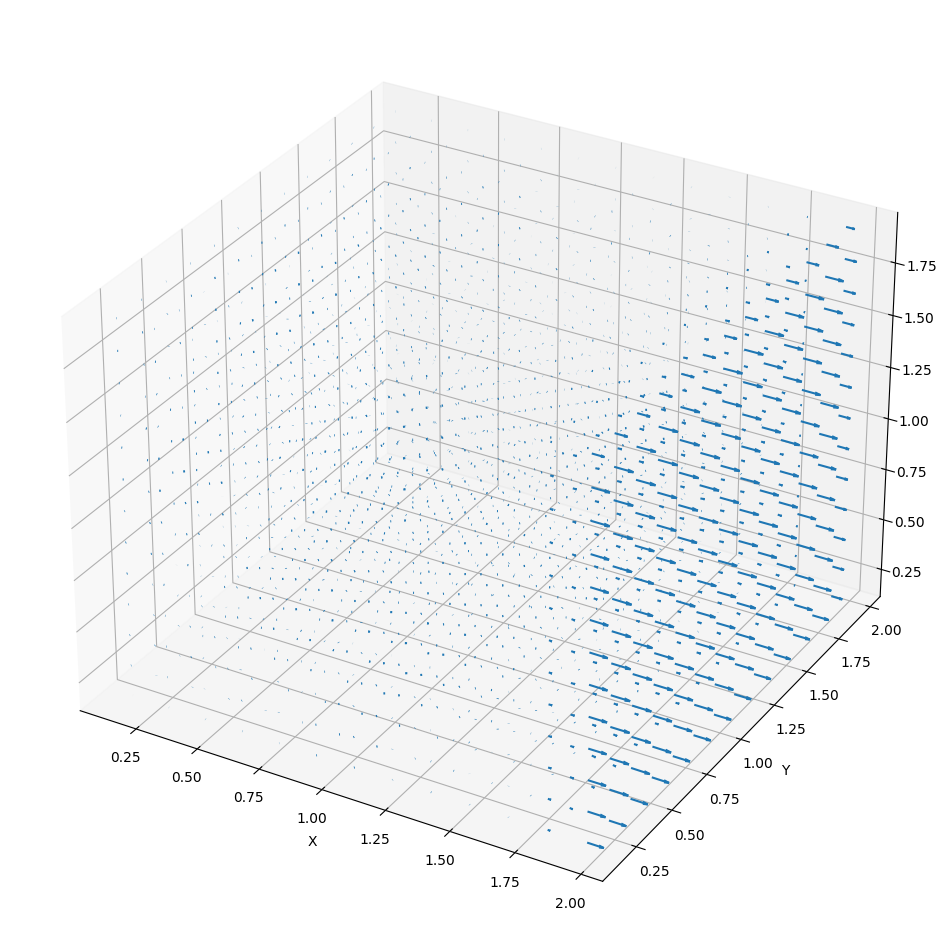

In [ ]:
# https://matplotlib.org/stable/gallery/mplot3d/quiver3d.html#sphx-glr-gallery-mplot3d-quiver3d-py
# Representación. Representación incorrecta
ax = plt.figure(figsize=(12, 14)).add_subplot(projection='3d') # 

frame = -1

u, v, w = U[frame], V[frame], W[frame], 

# Make the grid
x = np.linspace(xmin, xmax, nx)
y = np.linspace(ymin, ymax, ny)
z = np.linspace(zmin, zmax, nz)

X, Y, Z = np.meshgrid(x, y, z)

tomar_cada = 3

#ax.quiver(X, Y, Z, u, v, w, length=0.1, normalize=True)

quiver = ax.quiver(
        X[::tomar_cada, ::tomar_cada, ::tomar_cada], 
        Y[::tomar_cada, ::tomar_cada, ::tomar_cada], 
        Z[::tomar_cada, ::tomar_cada, ::tomar_cada], 
        u[::tomar_cada, ::tomar_cada, ::tomar_cada], 
        v[::tomar_cada, ::tomar_cada, ::tomar_cada], 
        w[::tomar_cada, ::tomar_cada, ::tomar_cada], 
        length=0.1
) # , normalize=True

plt.xlabel('X')
plt.ylabel('Y')

plt.show()

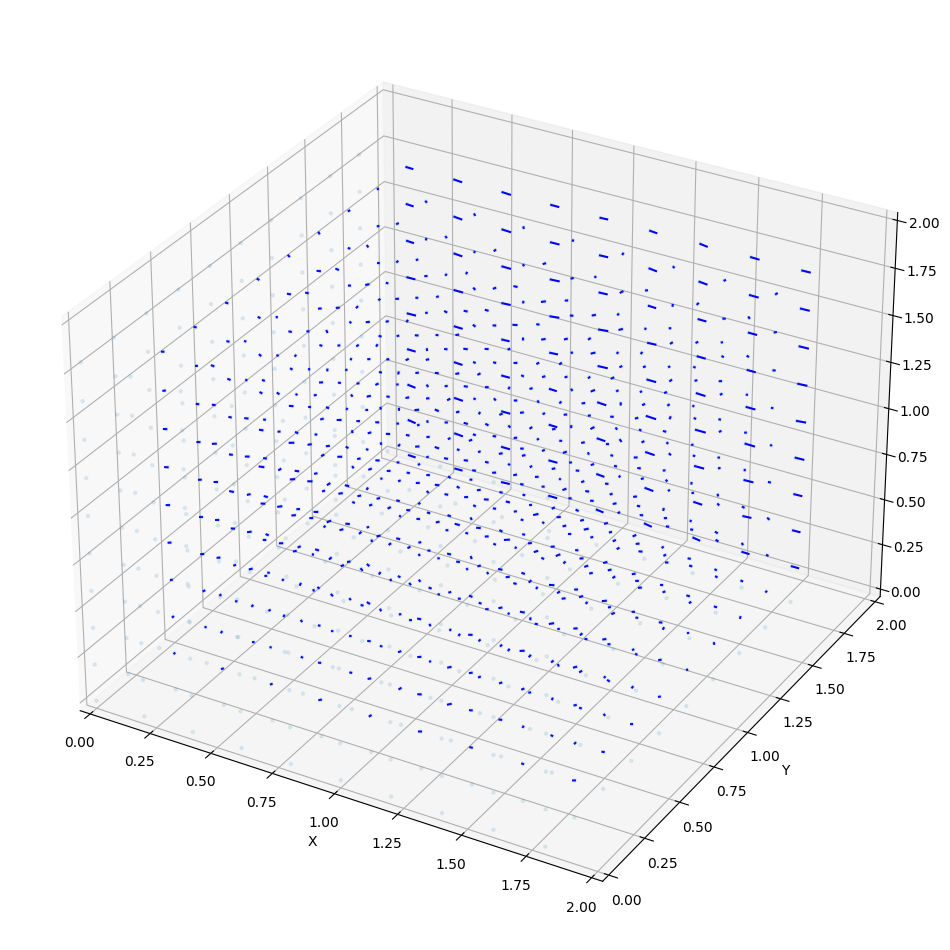

In [ ]:
# https://matplotlib.org/stable/gallery/mplot3d/quiver3d.html#sphx-glr-gallery-mplot3d-quiver3d-py
# Representación
# Esta es la representación correcta. Las condiciones de contorno estan diciendo que en el plano x = 2, velocidad en x es u = 1
ax = plt.figure(figsize=(12, 14)).add_subplot(projection='3d') # 

frame = -1

tomar_cada = 4

# Make the grid
x = np.linspace(xmin, xmax, nx)[::tomar_cada]
y = np.linspace(ymin, ymax, ny)[::tomar_cada]
z = np.linspace(zmin, zmax, nz)[::tomar_cada]

X, Y, Z = np.meshgrid(x, y, z)

u, v, w = U[frame][::tomar_cada, ::tomar_cada, ::tomar_cada], V[frame][::tomar_cada, ::tomar_cada, ::tomar_cada], W[frame][::tomar_cada, ::tomar_cada, ::tomar_cada]

# https://matplotlib.org/stable/gallery/animation/random_walk.html

to_plot = list()
to_sca = list()

# Normaliza 
const = 5
norm = np.max(np.sqrt(u*u + v*v + w*w))*const # De esta manera la velociada más grande tiene un modulo de 1/const

for k in range(0, nz//tomar_cada):
    for j in range(0, ny//tomar_cada):
        for i in range(0, nx//tomar_cada):
            to_plot.append(
            np.array([
                [x[i], (x[i] + u[k, j, i]/norm)], # *0.1 
                [y[j], (y[j] + v[k, j, i]/norm)], # *0.1 
                [z[k], (z[k] + w[k, j, i]/norm)]  # *0.1 
			]))
            to_sca.append(
                np.array([
                    x[i], y[j], z[k]
				])
			)

lines = [ax.plot([], [], [])[0] for _ in to_plot]

for line, points in zip(lines, to_plot):
    # https://matplotlib.org/stable/api/_as_gen/mpl_toolkits.mplot3d.art3d.Line3D.html#mpl_toolkits.mplot3d.art3d.Line3D.set_data_3d
    line.set_data_3d(points)
    line.set(color="b")

to_sca = np.array(to_sca).T

ax.scatter(to_sca[0], to_sca[1], to_sca[2], marker=".", alpha=0.1)

plt.xlabel('X')
plt.ylabel('Y')
ax.set_xlim((0, 2))
ax.set_ylim((0, 2))
ax.set_zlim((0, 2))

plt.show()

In [33]:
u[2, -1, 2]

1.0

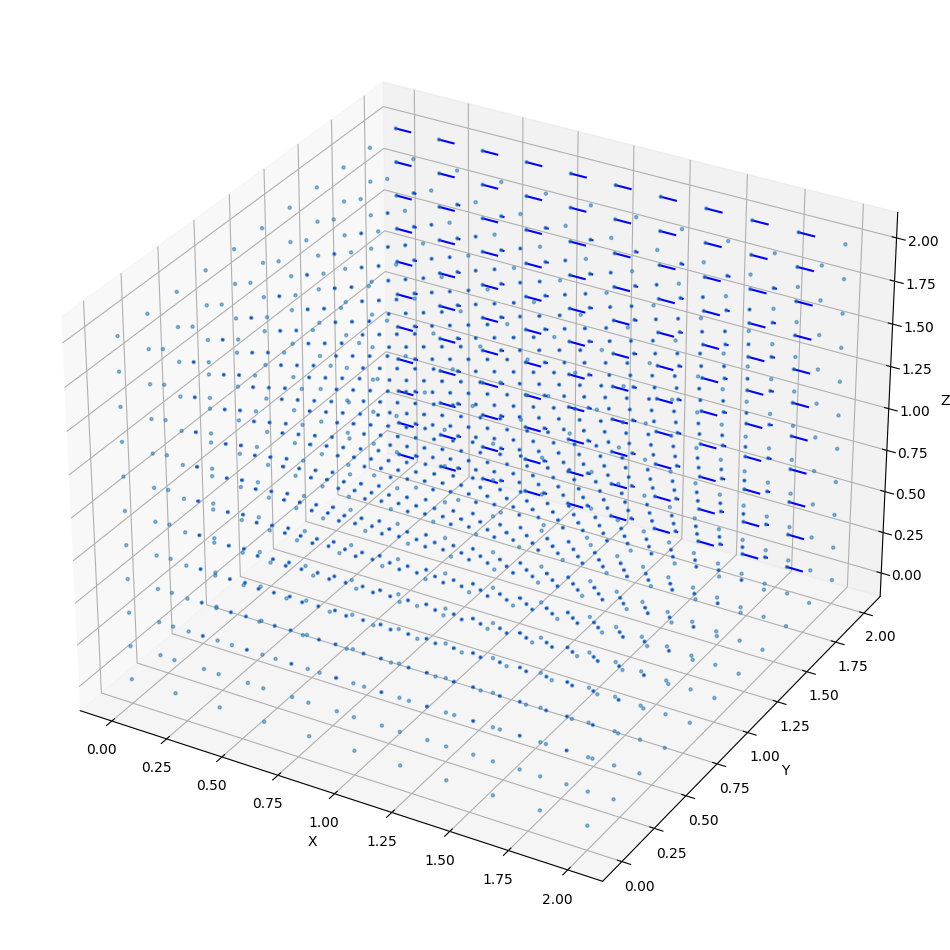

In [34]:
from matplotlib.animation import FuncAnimation

def get_to_plot(frame, U_data, V_data, W_data):
	u, v, w = U_data[frame][::tomar_cada, ::tomar_cada, ::tomar_cada], V_data[frame][::tomar_cada, ::tomar_cada, ::tomar_cada], W_data[frame][::tomar_cada, ::tomar_cada, ::tomar_cada]
	to_plot = list()

	for i, xi in enumerate(x):
		for j, yj in enumerate(y):
			for k, zk in enumerate(z):
				to_plot.append(
				np.array([
					[xi, (xi + u[k, j, i]/norm)], # *0.1 
					[yj, (yj + v[k, j, i]/norm)], # *0.1 
					[zk, (zk + w[k, j, i]/norm)]  # *0.1 
				]))
	
	return to_plot

x = np.linspace(xmin, xmax, nx)
y = np.linspace(ymin, ymax, ny)
z = np.linspace(zmin, zmax, nz)

fig = plt.figure(figsize=(12, 14))
ax = fig.add_subplot(projection='3d')

tomar_cada = 4

# Make the grid
x = x[::tomar_cada]
y = y[::tomar_cada]
z = z[::tomar_cada]

# Crea la grid de points en la imagen
to_sca = list()

for i in x:
	for j in y:
		for k in z:
			to_sca.append(np.array([i, j, k]))

to_sca = np.array(to_sca).T

ax.scatter(to_sca[0], to_sca[1], to_sca[2], marker=".", alpha=0.5)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z') # Añadir etiqueta para el eje Z

to_plot = get_to_plot(0, U, V, W)

# para normalizar 
const = 15
norm = np.max(np.sqrt(u*u + v*v + w*w))*const # De esta manera la velociada más grande tiene un modulo de 1/const

lines = [ax.plot([], [], [])[0] for _ in to_plot]

def update(frame, lines, U_data, V_data, W_data):
	"""
	Función de actualización para la animación.
	Actualiza las lineas.
	"""
	to_plot = get_to_plot(frame, U_data, V_data, W_data)
	
	for line, points in zip(lines, to_plot):
		# https://matplotlib.org/stable/api/_as_gen/mpl_toolkits.mplot3d.art3d.Line3D.html#mpl_toolkits.mplot3d.art3d.Line3D.set_data_3d
		line.set_data_3d(points)
		line.set(color="b")

	return lines

# Crear la animación
ani = FuncAnimation(fig, update, fargs=(lines, U, V, W), frames=len(U), blit=True, interval=50) # interval en ms
ani.save("anim.gif", fps=20, writer="pillow")

https://drzgan.github.io/Python_CFD/15.1.%20Cavity%20flow%20with%20upwind%20scheme.html#try-a-case-with-re-400-and-what-happens